In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
data = []
labels = []

covid = os.listdir("/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/images")

for i in covid:
  image = cv2.imread("/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/images/" + i)
  image = cv2.resize(image,(120,120))
  data.append(image)
  labels.append(0)

In [3]:
normal = os.listdir("/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/images")[0:3616]

for i in normal:
  image = cv2.imread("/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/images/" + i)
  image = cv2.resize(image,(120,120))
  data.append(image)
  labels.append(1)

In [4]:
VN = os.listdir("/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia/images")
for i in VN:
  image = cv2.imread("/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia/images/" + i)
  image = cv2.resize(image,(120,120))
  data.append(image)
  labels.append(2)

In [5]:
import numpy as np
import pandas as pd

In [6]:
img_data = np.array(data)/255.0
img_labels = np.array(labels)

In [6]:
#For efficient nets 
img_data = np.array(data)
img_labels = np.array(labels)

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras import Sequential
from keras.layers import Dense,Flatten

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(img_data,img_labels,test_size = 0.2,random_state = 42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size = 0.2,random_state = 42)

y_train = tf.keras.utils.to_categorical(y_train,num_classes = 3)
y_test = tf.keras.utils.to_categorical(y_test,num_classes = 3)
y_valid = tf.keras.utils.to_categorical(y_valid,num_classes = 3)

In [9]:
from keras.applications.vgg16 import VGG16
conv_base = VGG16(
    weights= 'imagenet',
    include_top = False,
    input_shape = (120,120,3)
)

58900480/58889256 [==============================] - 2s 0us/step


In [10]:
# Fine tuning VGG16
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
for layer in conv_base.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [9]:
# from keras.applications.inception_v3 import InceptionV3
# conv_base = InceptionV3(
#     weights= 'imagenet',
#     include_top = False,
#     input_shape = (120,120,3)
# )

2023-02-13 17:50:32.334578: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-13 17:50:32.448001: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-13 17:50:32.449203: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-13 17:50:32.451410: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

87924736/87910968 [==============================] - 5s 0us/step


In [10]:
# #Fine tuning Inception V3
# for layer in conv_base.layers[:249]:
#     layer.trainable = False
# for layer in conv_base.layers[249:]:
#     layer.trainable = True

In [9]:
from tensorflow.keras.applications import EfficientNetB0

conv_base = EfficientNetB0(weights='imagenet', 
                           include_top=False, 
                           input_shape=(120, 120, 3))

16719872/16705208 [==============================] - 0s 0us/step


In [15]:
from tensorflow.keras.applications import EfficientNetB7

conv_base = EfficientNetB7(weights='imagenet', 
                           include_top=False, 
                           input_shape=(120, 120, 3))

258088960/258076736 [==============================] - 9s 0us/step


In [1]:
from tensorflow.keras.applications import ResNet50

conv_base = ResNet50(weights='imagenet', 
                           include_top=False, 
                           input_shape=(120, 120, 3))

94781440/94765736 [==============================] - 0s 0us/step


In [10]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(3,activation = 'softmax'))

In [ ]:
# for layer in conv_base.layers[:150]:
#     layer.trainable = False
# for layer in conv_base.layers[150:]:
#     layer.trainable = True

In [ ]:
# conv_base.summary()

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 387       
Total params: 40,530,051
Trainable params: 40,476,931
Non-trainable params: 53,120
_____________________________________

In [12]:
from tensorflow.keras.optimizers import Adam
optimizers = Adam(learning_rate = 0.0001)
model.compile(optimizer = optimizers,loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [13]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

**SGD OPTIMIZER**

In [12]:
from tensorflow.keras.optimizers import SGD
optimizers = SGD(learning_rate = 0.01)
model.compile(optimizer = optimizers,loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [13]:
early_stop = EarlyStopping(patience = 10,min_delta = 0.001,restore_best_weights = True)

In [14]:
history = model.fit(X_train,y_train,batch_size = 32,epochs = 50, validation_data = (X_valid,y_valid),callbacks = [early_stop])

Epoch 1/50
172/172 [==============================] - 32s 98ms/step - loss: 0.2735 - accuracy: 0.8940 - val_loss: 0.3364 - val_accuracy: 0.8689
Epoch 2/50
172/172 [==============================] - 15s 86ms/step - loss: 0.0629 - accuracy: 0.9785 - val_loss: 0.3554 - val_accuracy: 0.8878
Epoch 3/50
172/172 [==============================] - 15s 86ms/step - loss: 0.0386 - accuracy: 0.9867 - val_loss: 0.2227 - val_accuracy: 0.9294
Epoch 4/50
172/172 [==============================] - 15s 88ms/step - loss: 0.0280 - accuracy: 0.9902 - val_loss: 0.1526 - val_accuracy: 0.9505
Epoch 5/50
172/172 [==============================] - 15s 86ms/step - loss: 0.0169 - accuracy: 0.9942 - val_loss: 0.1155 - val_accuracy: 0.9716
Epoch 6/50
172/172 [==============================] - 16s 93ms/step - loss: 0.0127 - accuracy: 0.9965 - val_loss: 0.0836 - val_accuracy: 0.9782
Epoch 7/50
172/172 [==============================] - 15s 86ms/step - loss: 0.0218 - accuracy: 0.9925 - val_loss: 0.1433 - val_accuracy:

In [15]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions,axis= 1)
y_test_new = np.argmax(y_test,axis = 1)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test_new,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       734
           1       0.99      0.97      0.98       710
           2       0.97      0.99      0.98       272

    accuracy                           0.98      1716
   macro avg       0.98      0.98      0.98      1716
weighted avg       0.98      0.98      0.98      1716



In [17]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test_new,y_pred),columns = ['COVID19','NORMAL','PNEUMONIA'],index = ['COVID19','NORMAL','PNEUMONIA'])

,COVID19,NORMAL,PNEUMONIA
COVID19,724,7,3
NORMAL,15,690,5
PNEUMONIA,1,3,268


In [18]:
loss_and_metrics = model.evaluate(X_test,y_test)

54/54 [==============================] - 1s 18ms/step - loss: 0.0837 - accuracy: 0.9802


In [19]:
print("Test loss: ",loss_and_metrics[0])
print("Test accuracy: ",loss_and_metrics[1])

Test loss:  0.08371444791555405
Test accuracy:  0.9801864624023438


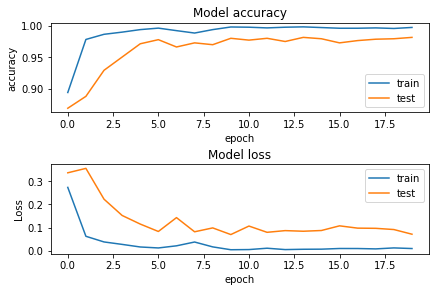

In [20]:
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'lower right')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper right')
plt.tight_layout(pad=0.5)
plt.savefig('/kaggle/working/VGGUNTUNED.png')

In [21]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test_new,y_pred)

0.9681485540529218

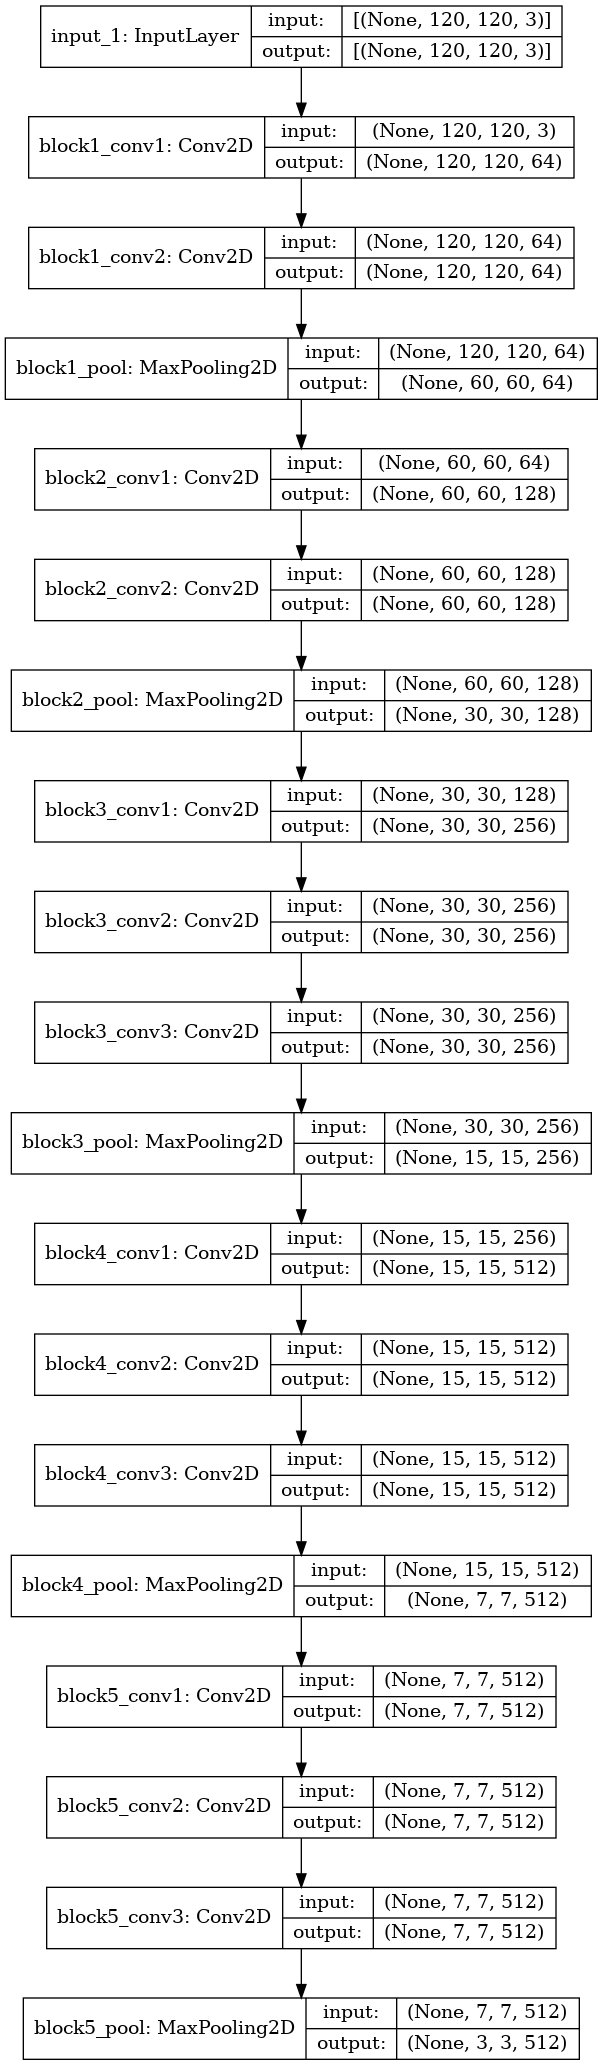

In [22]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
plot_model(conv_base, to_file='model_plot.png', show_shapes=True, show_layer_names=True)